## Thera Bank Personal Loan Campaign

### Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer ($000$)
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month ($000$)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. ($000$)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score,\
                            f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

from yellowbrick.classifier import ClassificationReport, ROCAUC

from scipy import stats

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')  
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
# Shape
data.shape

(5000, 14)

In [6]:
# Null Values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Incorrect Imputation
# The dataset has no null values but Experience has negative values,
# which are illegal values as the field pertains to number of years.
# However, they will be ignored since no data cleansing is asked and 
# the number of records is small (52)

data[data['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    - Number of unique in each column?
    - Number of people with zero mortgage?
    - Number of people with zero credit card spending per month?
    - Value counts of all categorical columns.
    - Univariate and Bivariate
    - Get data model ready


In [8]:
# Number of unique in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
# Drop ID column
data = data.drop(['ID', 'ZIP Code'], axis =1) 
#data = data.drop('ZIP Code', axis =1) 

data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [10]:
# Number of people with zero mortgage
data[data['Mortgage'] == 0].shape[0]

3462

In [11]:
# Number of people with zero credit card spending per month
data[data['CCAvg'] == 0].shape[0]

106

In [12]:
# Value counts of all categorical columns.
cat_cols = [data.columns[3], data.columns[5], data.columns[7],
           data.columns[8], data.columns[9], data.columns[10], data.columns[11]]
for i in list(cat_cols):
    print(pd.DataFrame(data[i].value_counts()))
    print()

   Family
1    1472
2    1296
4    1222
3    1010

   Education
1       2096
3       1501
2       1403

   Personal Loan
0           4520
1            480

   Securities Account
0                4478
1                 522

   CD Account
0        4698
1         302

   Online
1    2984
0    2016

   CreditCard
0        3530
1        1470



In [13]:
# Data distribution in each attribute and target variable

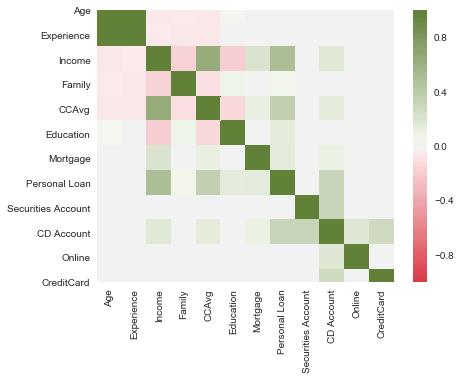

In [14]:
plt.figure(figsize = (7,5))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 110, n=200),
    square=True
)

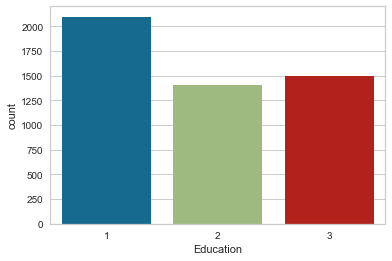

In [15]:
sns.countplot(data['Education']);

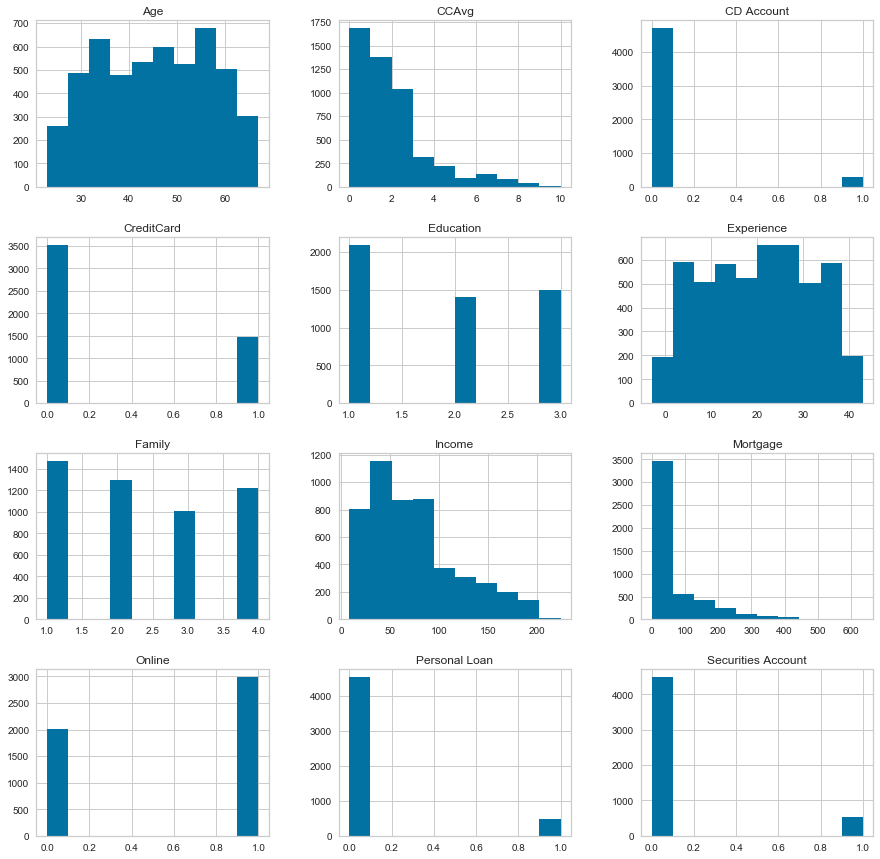

In [16]:
# Univariate Analysis
data.hist(figsize=(15, 15));

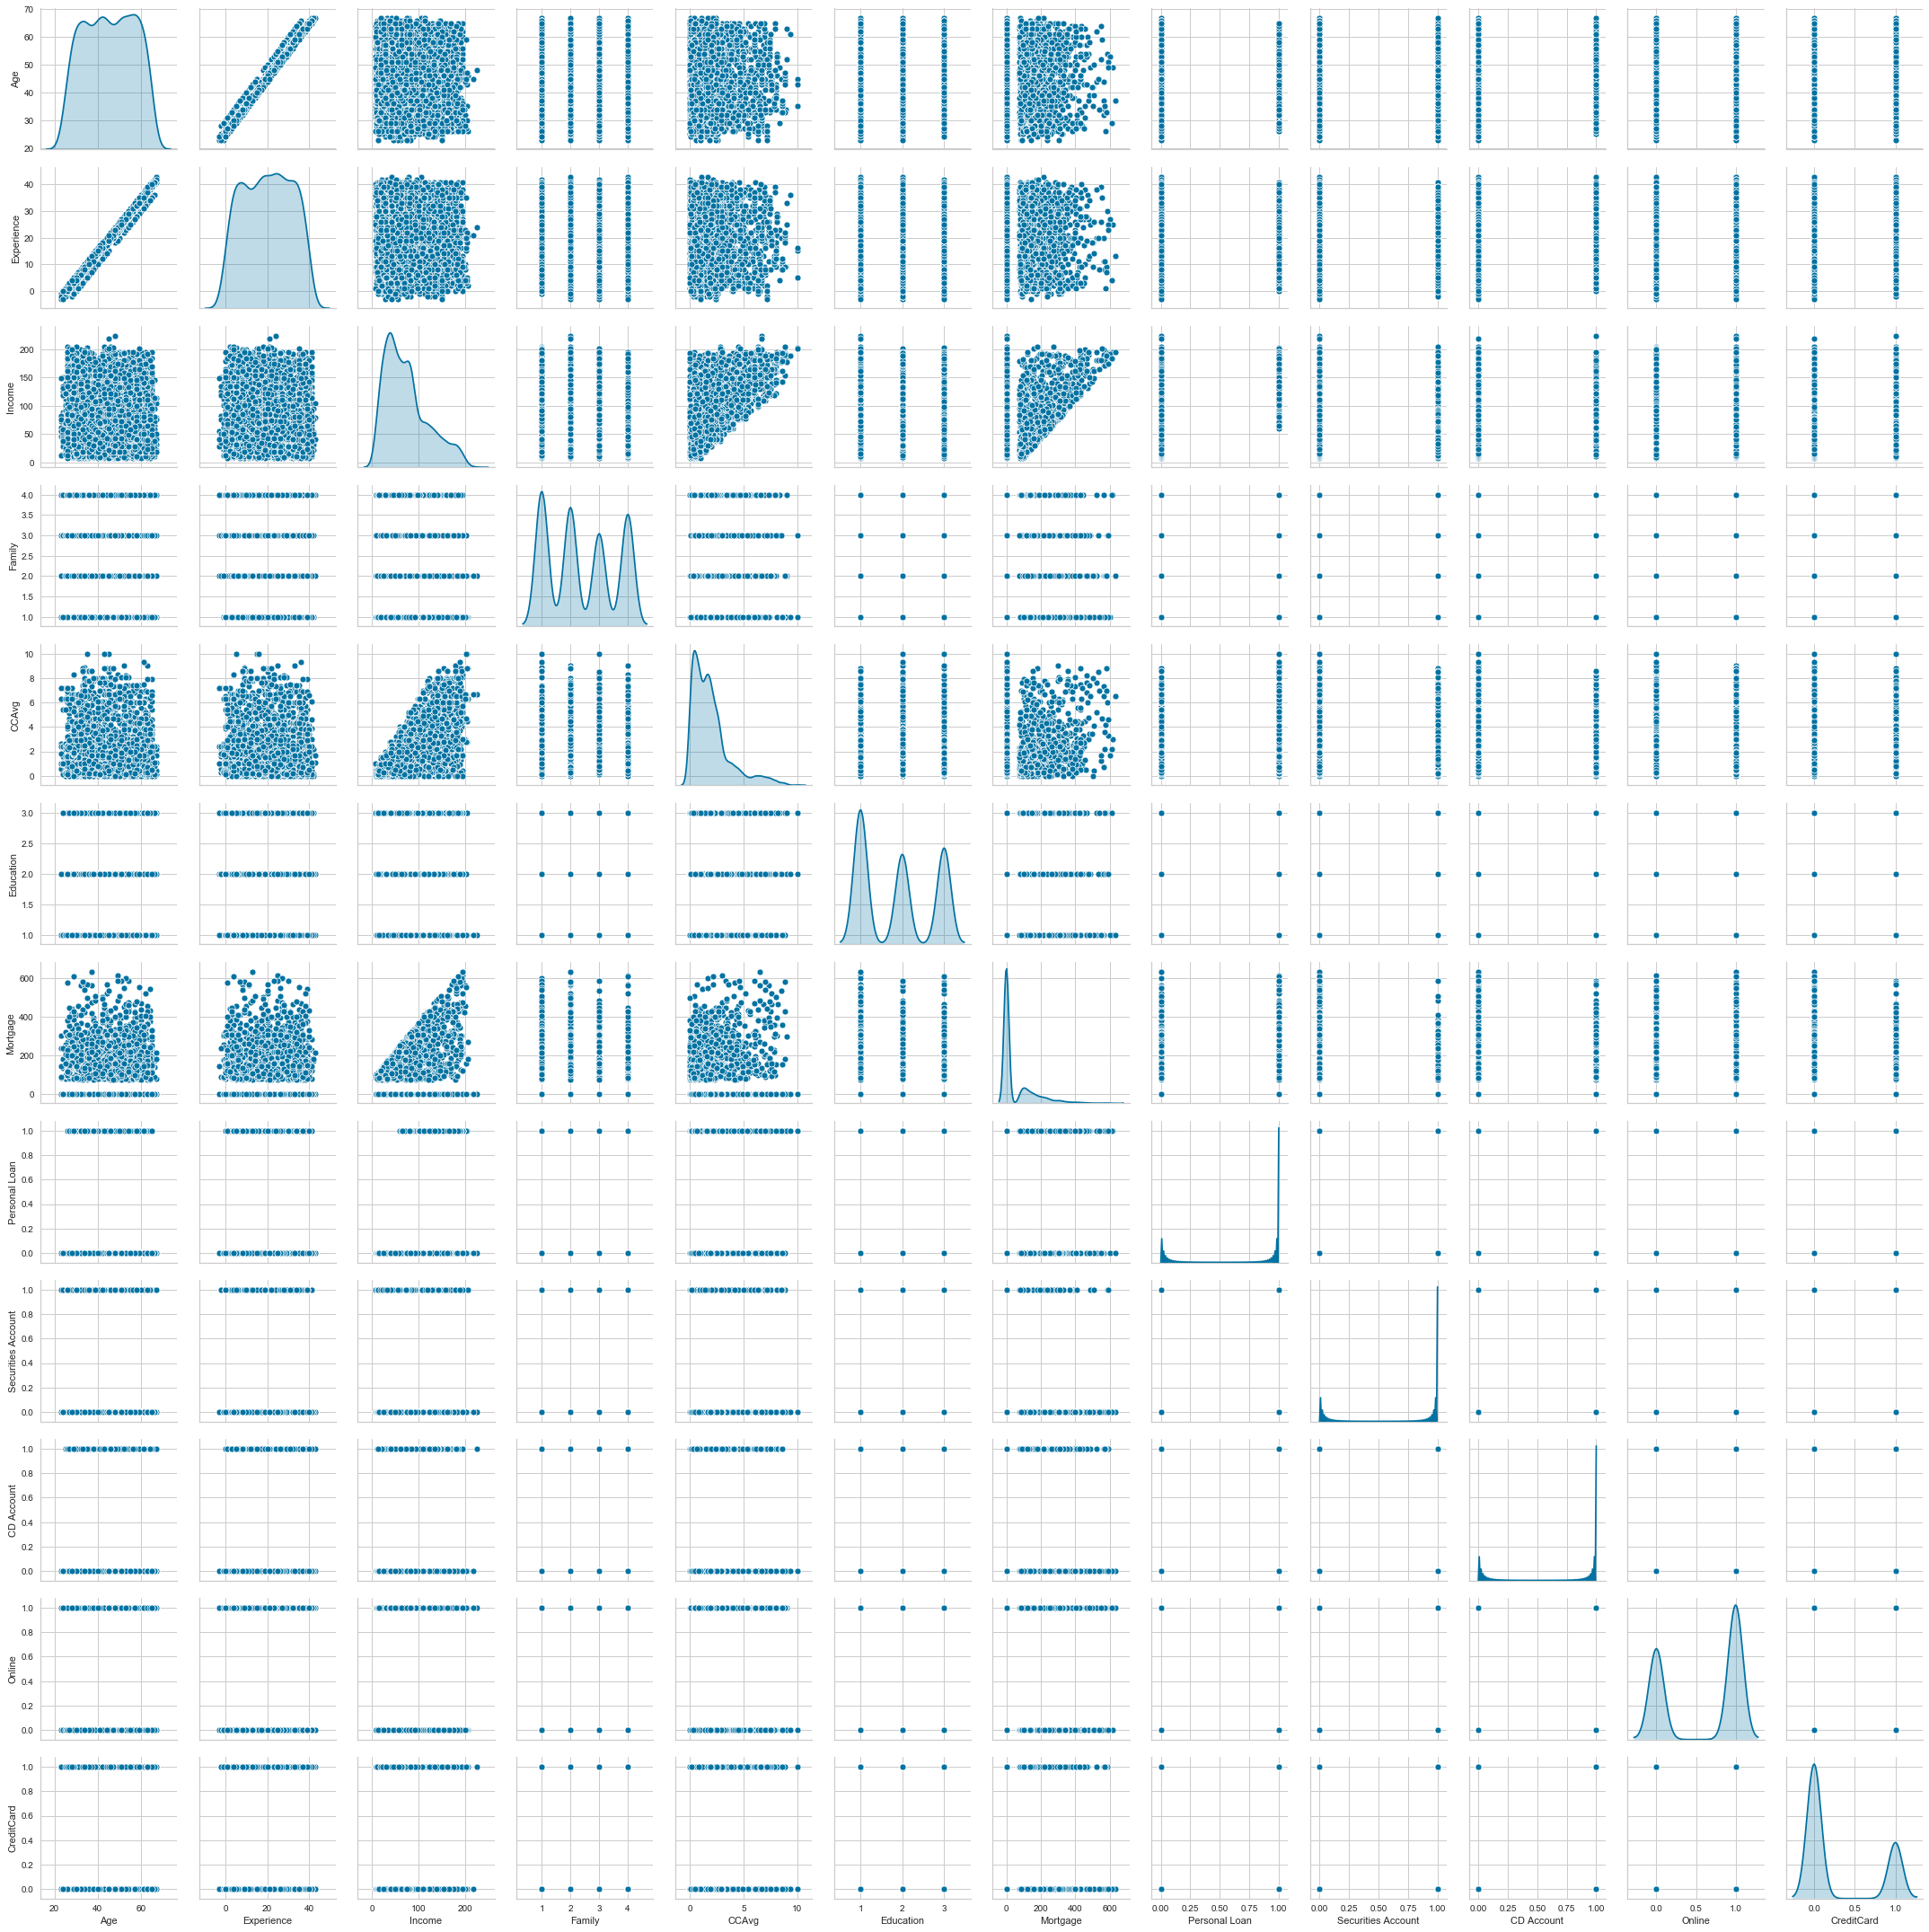

In [17]:
# Bivariate Analysis
sns.pairplot(data, diag_kind='kde');

#### Findins from EDA
 - Age and Experience are two independent variables with strong correlation (multicolinearity?)
 - ZIP Code can ignored

In [18]:
data.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.132301,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [19]:
# Get the Distribution of Predicted Variable
prop_Y = data['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [21]:
n_true = len(data.loc[data['Personal Loan'] == True])
n_false = len(data.loc[data['Personal Loan'] == False])
print("Number of true cases (purchase): {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases (no purchase): {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases (purchase): 480 (9.60%)
Number of false cases (no purchase): 4520 (90.40%)


In [22]:
# Change data types to Category
cols = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
data[cols] = data[cols].astype('category')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.5 KB


In [24]:
# Get data model ready
X = data.drop('Personal Loan',axis=1)
Y = data[['Personal Loan']]

# Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [25]:
X

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,1.6,0,0,0,1,0,0,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,0,1,0,0,1,0
4996,30,4,15,0.4,85,0,0,1,0,0,0,0,1,0
4997,63,39,24,0.3,0,1,0,0,0,1,0,0,0,0
4998,65,40,49,0.5,0,0,1,0,1,0,0,0,1,0


3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

In [28]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('X_test shape:', y_test.shape)

X_train shape: (3500, 14)
y_train shape: (3500, 1)
X_test shape: (1500, 14)
X_test shape: (1500, 1)


4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

##### Method 1

In [31]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train.values))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.107495
         Iterations 10


In [32]:
X.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3',
       'Securities Account_1', 'CD Account_1', 'Online_1', 'CreditCard_1'],
      dtype='object')

In [33]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Sat, 09 May 2020   Pseudo R-squ.:                  0.6566
Time:                        04:43:15   Log-Likelihood:                -376.23
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.527e-299
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8096      2.251     -5.690      0.000     -17.222      -8.398
x1            -0.0238      0.083     -0.288      0.773      -0.186       0.138
x2             0.0290      0.082      0.353      0.7

###### Interpretation of Pseudo R^2

A pseudo R^2 of 66% indicates that 66% of the uncertainty of the intercept only model is explained by the full model

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [34]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [35]:
# Filter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
x10,4.28,72.24,0.99,0.00
x9,4.01,55.02,0.98,0.00
x12,3.71,40.72,0.98,0.00
x7,2.49,12.04,0.92,0.00
x8,1.64,5.16,0.84,0.00
x4,0.25,1.28,0.56,0.00
x3,0.06,1.06,0.52,0.00
x13,-0.59,0.56,0.36,0.00
x14,-1.00,0.37,0.27,0.00
x11,-1.07,0.34,0.26,0.01


##### Method 2

In [36]:
# Fit the model on train
baseline_model = LogisticRegression(solver="liblinear", random_state=42)
baseline_model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Predict on test
y_predict = baseline_model.predict(X_test)

# Print Coefficient 
coef_df = pd.DataFrame(baseline_model.coef_)
coef_df['intercept'] = baseline_model.intercept_
print(coef_df)

      0    1    2    3    4     5    6    7    8    9    10   11    12    13  \
0 -0.37 0.37 0.05 0.21 0.00 -0.18 2.01 1.30 3.24 3.54 -0.78 3.00 -0.51 -0.83   

   intercept  
0      -1.99  


In [38]:
# Print Model Score
model_score = baseline_model.score(X_test, y_test)
print(model_score)

0.9533333333333334


In [39]:
cm = confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
df_cm

,Predict 1,Predict 0
1,90,59
0,11,1340


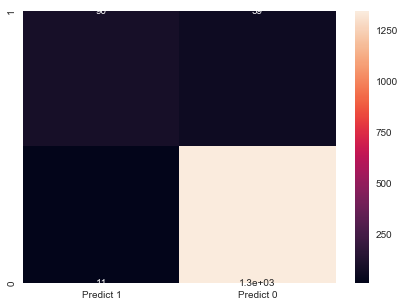

In [40]:
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [41]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9608571428571429

Testing accuracy 0.9533333333333334

Confusion Matrix


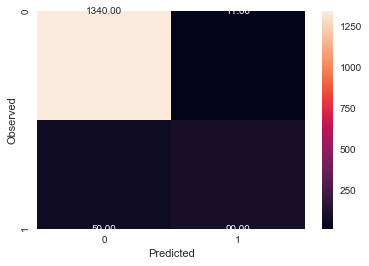

None

Recall: 0.6040268456375839

Precision: 0.8910891089108911

F1 Score: 0.72

Roc Auc Score: 0.7979423643435883


In [42]:
print("Trainig accuracy", baseline_model.score(X_train, y_train))  
print()
print("Testing accuracy", baseline_model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test, y_predict))
print()
print("Recall:", recall_score(y_test, y_predict))
print()
print("Precision:", precision_score(y_test, y_predict))
print()
print("F1 Score:", f1_score(y_test, y_predict))
print()
print("Roc Auc Score:", roc_auc_score(y_test, y_predict))

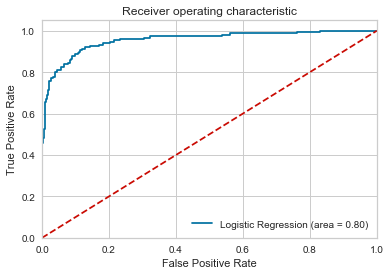

In [43]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, baseline_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, baseline_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
# Display All Model Hyperparameters 
baseline_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter

#### To improve the model, 

1. we can experiment with different values for some parameters such as

    - C
    - penalty
    - solver

and then select the best model in terms of the metrics applicable to the business case

2. The data is highly skewed for the predicted value (personal loan) so the distribution might need to be balanced 

3. Some predictors are insignificant to the model are shown in p-values above,
so they might be dropped.

In [45]:
# Changing 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42, penalty='l2', C = 0.75, solver=i)  # changing values of solver
    model.fit(X_train, y_train.values.ravel()) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.961, 0.961, 0.96, 0.908, 0.907]

[0.952, 0.953, 0.951, 0.901, 0.905]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The best l2 solver from the step above is newton-cg

In [46]:
# Changing C with best solver in l2
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42, penalty='l2', solver='newton-cg',
                               class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train.values.ravel()) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.885, 0.911, 0.913, 0.914, 0.915, 0.916]

[0.879, 0.903, 0.909, 0.913, 0.914, 0.915]


The best C for l2 from the step above is 1

In [74]:
# Changing penalty to l1 with liblinear solver
model = LogisticRegression(random_state=42, penalty='l1', solver='liblinear') 

model.fit(X_train, y_train.values.ravel())

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train, y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))  
print()
print("Recall:", recall_score(y_test, y_predict))
print()
print("Precision:", precision_score(y_test, y_predict))
print()
print("F1 Score:", f1_score(y_test, y_predict))
print()
print("Roc Auc Score:", roc_auc_score(y_test, y_predict))

Trainig accuracy 0.9625714285714285

Testing accuracy 0.954

Recall: 0.6040268456375839

Precision: 0.9

F1 Score: 0.7228915662650601

Roc Auc Score: 0.7983124605686069


In [48]:
# Changing penalty to l1 with saga solver
model = LogisticRegression(random_state=42, penalty='l1', solver='saga') 

model.fit(X_train, y_train.values.ravel())

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train, y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test)) 
print()
print("Recall:", recall_score(y_test, y_predict))
print()
print("Precision:", precision_score(y_test, y_predict))
print()
print("F1 Score:", f1_score(y_test, y_predict))
print()
print("Roc Auc Score:", roc_auc_score(y_test, y_predict))

Trainig accuracy 0.9068571428571428

Testing accuracy 0.9053333333333333

Recall: 0.2684563758389262

Precision: 0.547945205479452

F1 Score: 0.36036036036036034

Roc Auc Score: 0.6220150124938524


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [49]:
# Changing C with l1 and best solver 
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42, penalty='l1', solver='liblinear',
                               class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train.values.ravel()) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
    
print(C)
print()
print(train_score)
print()
print(test_score)


[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.861, 0.91, 0.912, 0.915, 0.916, 0.916]

[0.843, 0.907, 0.908, 0.911, 0.914, 0.915]


From the steps above, the best C for l1 is 1 and best solver is liblinear

Trainig accuracy 0.9142857142857143

Testing accuracy 0.9126666666666666

Confusion Matrix


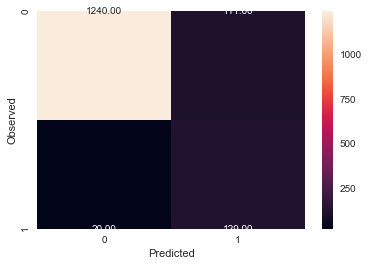

None

Recall: 0.8657718120805369

Precision: 0.5375

F1 Score: 0.6632390745501285

Roc Auc Score: 0.8918052250632145


In [75]:
# Final l2 model is
model_l2 = LogisticRegression(random_state=42, penalty='l2', class_weight='balanced', 
                              solver='newton-cg', C=0.5) 
model_l2.fit(X_train, y_train.values.ravel())
y_predict = model_l2.predict(X_test)

print("Trainig accuracy",model_l2.score(X_train,y_train))  
print()
print("Testing accuracy",model_l2.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test, y_predict))
print()
print("Precision:",precision_score(y_test, y_predict))
print()
print("F1 Score:",f1_score(y_test, y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_predict))

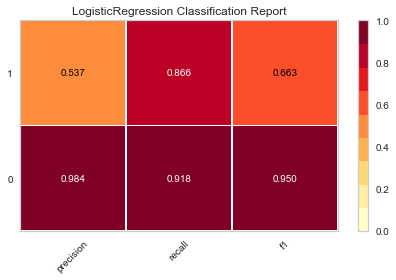

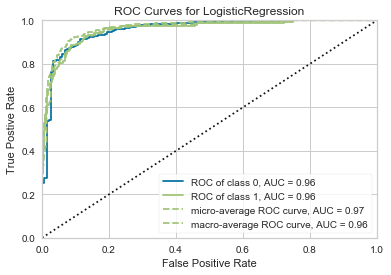

In [76]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model_l2)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model_l2)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

Trainig accuracy 0.9625714285714285

Testing accuracy 0.954

Confusion Matrix


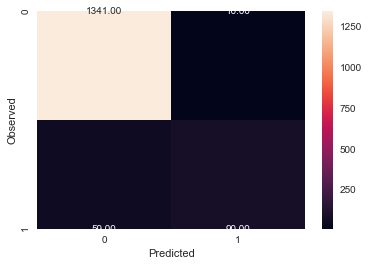

None

Recall: 0.6040268456375839

Precision: 0.9

F1 Score: 0.7228915662650601

Roc Auc Score: 0.7983124605686069


In [79]:
# Final l1 model is
model_l1 = LogisticRegression(random_state=42, penalty='l1',\
                              solver='liblinear', C=1) 
model_l1.fit(X_train, y_train.values.ravel())
y_predict = model_l1.predict(X_test)
print("Trainig accuracy",model_l1.score(X_train,y_train))  
print()
print("Testing accuracy",model_l1.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test, y_predict))
print()
print("Precision:",precision_score(y_test, y_predict))
print()
print("F1 Score:",f1_score(y_test, y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_predict))

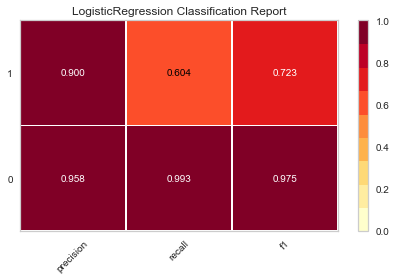

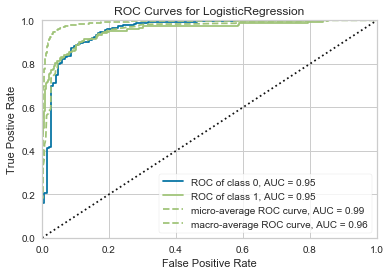

In [80]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model_l1)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model_l1)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

#### Using Grid Search for Hyperparameter Tuning 

In [64]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [65]:
logistic = LogisticRegression()
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=False)

best_model = clf.fit(X_train, y_train.values.ravel())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [66]:
best_model.best_estimator_

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
best_model.best_estimator_.get_params()

{'C': 7.742636826811269,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [68]:
print (f'Accuracy: {best_model.score(X_train,y_train):.3f}')

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Accuracy: 0.963
Best Penalty: l2
Best C: 7.742636826811269


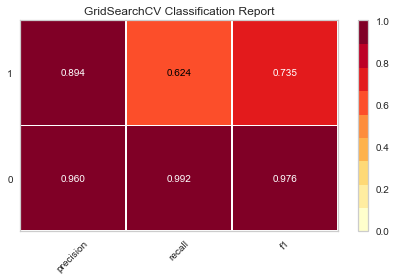

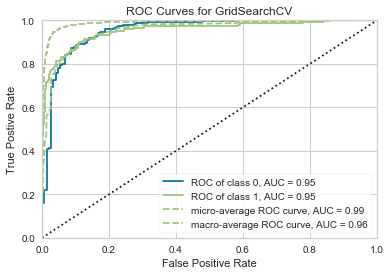

In [69]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(best_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(best_model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

6. Give Business understanding of your model? (5 marks)

##### Definitions of the Confucion Matrix metrics in context of the business problem
- *True Positive (observed=1, predicted=1):*

The model predicted that a liability customer will buy personal loans and the customer actually bought personal loans

- *False Positive (observed=0, predicted=1):*

The model predicted that a liability customer will buy personal loans and the customer actually did not buy personal loans


- *True Negative (observed=0,predicted=0):*

The model predicted that a liability customer will not buy personal loans and the customer actually did not buy personal loans

- *False Negative (observed=1,predicted=0):*

The model predicted that a liability customer will not buy personal loans and the customer actually bought personal loans

###### Should the model be used? 
The bank's objective is to model a previous campaign data to sell personal loans to liability customers and apply the model to new campaigns. From a business perspective, therefore, it is save to assume that the bank is interested in decreasing the number of customers who will recieve the offer but will not respond to the campaign (i.e. reduce the false positives of the model, low recall).

On the other hand, the number of liability customers who buy personal loans without receiving capmagin offers/ads can be as high as possible as that would contibute to acheiveing the bank's objective, although indirectly. Therefore, the model's precision in this context outweighs recall.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict of the liability customers who will respond to the capmaigns for personal loan. They can use the model for upcoming campaigns.

###### The best model
As shown above, the best model that has the highest precision and lowest recall is either
 - solver=liblinear, l1 with C=1, or (precision:0.9 & recall:0.6040268456375839)
 - solver=newton-cg, l2 with C=7.742636826811269 (precision:0.912621359223301 & recall:0.6308724832214765)

Trainig accuracy 0.9622857142857143

Testing accuracy 0.9573333333333334

Confusion Matrix


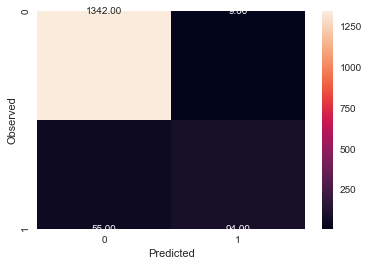

None

Recall: 0.6308724832214765

Precision: 0.912621359223301

F1 Score: 0.746031746031746

Roc Auc Score: 0.8121053755855717


In [86]:
model_3 = LogisticRegression(random_state=42, penalty='l2', 
                              solver='newton-cg', C=7.742636826811269) 
model_3.fit(X_train, y_train.values.ravel())
y_predict = model_3.predict(X_test)

print("Trainig accuracy",model_3.score(X_train,y_train))  
print()
print("Testing accuracy",model_3.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test, y_predict))
print()
print("Precision:",precision_score(y_test, y_predict))
print()
print("F1 Score:",f1_score(y_test, y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_predict))

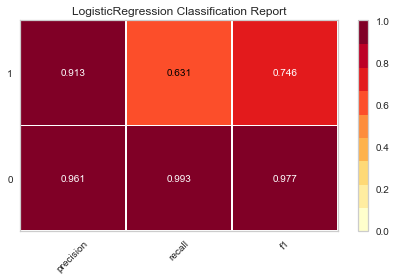

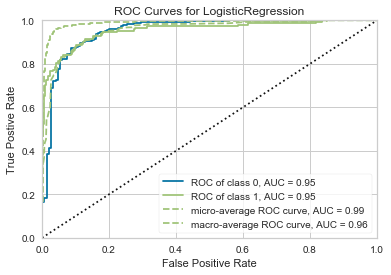

In [87]:
# Additional

# Visualize model performance with yellowbrick library
viz = ClassificationReport(model_3)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model_3)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();